In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# 1. Data Manipulation:
# ● Extract the 5th column and store it in ‘customer_5’
customer_5=df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [ ]:
# Extract the 15th column and store it in ‘customer_15’
customer_15=df.iloc[:,14]

In [ ]:
# Extract all the male senior citizens whose payment method is electronic
# check and store the result in ‘senior_male_electronic’
senior_male_electronic=df[(df['gender']=='Male') & (df['PaymentMethod']=='Electronic check') & (df['SeniorCitizen']== 1)]

In [ ]:
# Extract all those customers whose tenure is greater than 70 months or
# their monthly charges is more than $100 and store the result in
# ‘customer_total_tenure’
condition = (df['tenure'] > 70) | (df['MonthlyCharges'] > 100)
customer_total_tenure = df[condition]

In [ ]:
#  Extract all the customers whose contract is of two years, payment method
# is mailed check and the value of churn is ‘Yes’ and store the result in
# ‘two_mail_yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]

In [ ]:
#  Extract 333 random records from the customer_churndataframe and store
# the result in ‘customer_333’
customer_333 = df.sample(n=333, random_state=42)

In [ ]:
# Get the count of different levels from the ‘Churn’ column
churn_counts = df['Churn'].value_counts()
churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# 2. Data Visualization:
# ● Build a bar-plot for the ’InternetService’ column:
# a. Set x-axis label to ‘Categories of Internet Service’
# b. Set y-axis label to ‘Count of Categories’
# c. Set the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange'


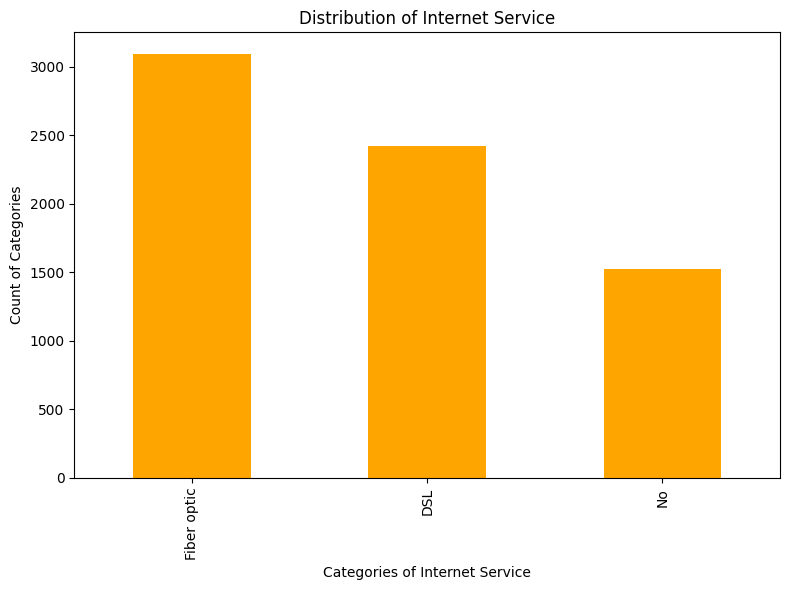

In [ ]:
internet_service_counts = df['InternetService'].value_counts()

plt.figure(figsize=(8,6))
internet_service_counts.plot(kind='bar',color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.tight_layout() #for no overlapping
plt.show()



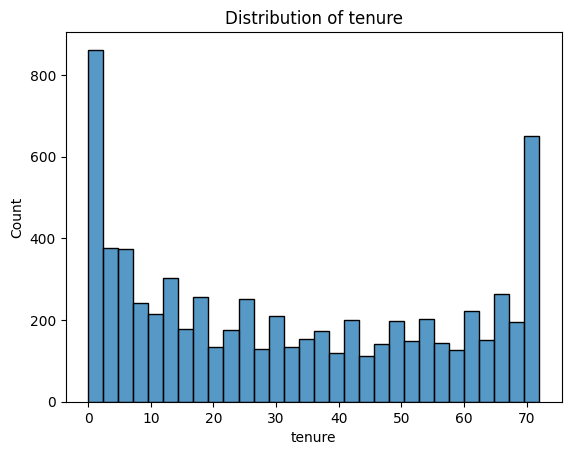

In [ ]:
# Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure'

sns.histplot(df['tenure'],bins=30)
plt.title('Distribution of tenure')
plt.show()

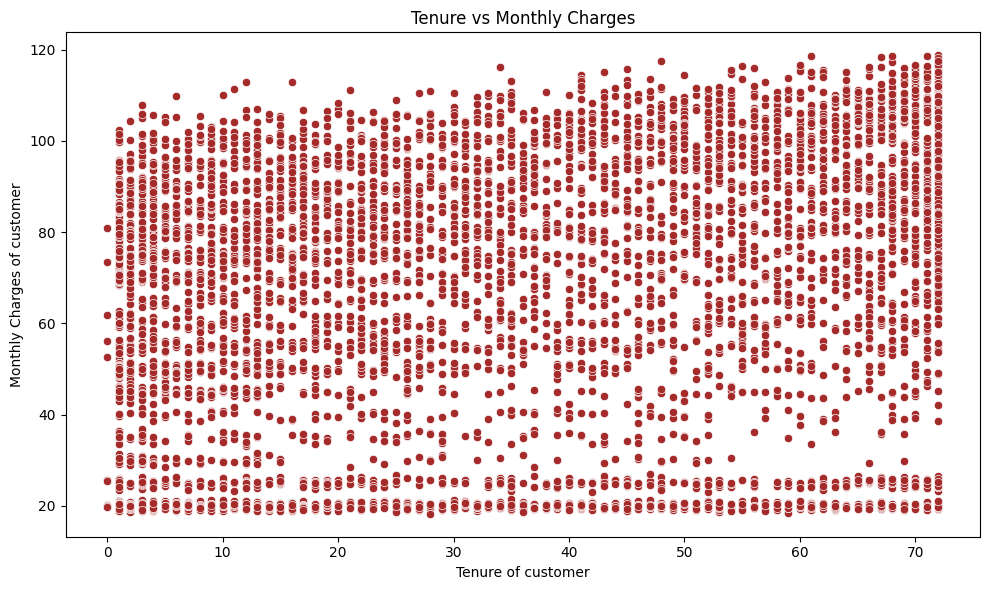

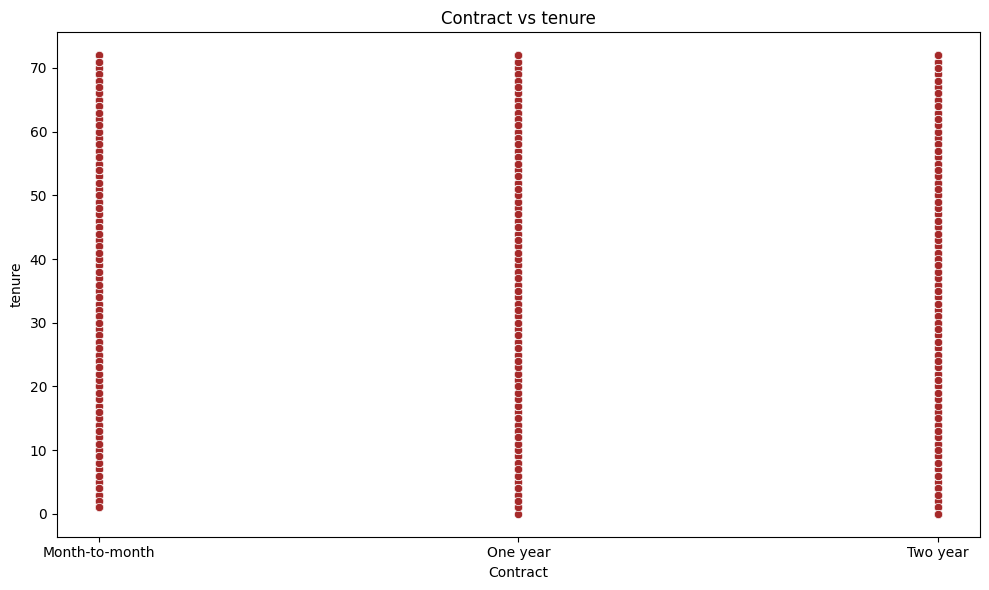

In [ ]:
# Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
# ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
# y-axis &
# f. ‘Contract’ on the x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df,color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Contract',y='tenure',data=df,color='brown')
plt.xlabel('Contract')
plt.ylabel('tenure')
plt.title('Contract vs tenure')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Linear Regression:
# ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
# and independent variable is ‘tenure’:
# a. Divide the dataset into train and test sets in 70:30 ratio.
# b. Build the model on train set and predict the values on test set
# c. After predicting the values, find the root mean square error
# d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=df[['tenure']]
y=df['MonthlyCharges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([55.10659011, 67.43520921, 70.82557946, ..., 73.29130328,
       60.96268418, 61.57911514])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
error = y_test - y_pred
print("Root Mean Squared Error:", rmse)
print("Error in Prediction:\n", error)

Root Mean Squared Error: 29.07936015646814
Error in Prediction:
 185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
          ...    
5522    15.043410
6377   -10.456590
5500   -12.791303
2392    29.737316
6705   -10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64


In [ ]:
# Logistic Regression:
# ● Build a simple logistic regression model where dependent variable is
# ‘Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score
# d. Build a multiple logistic regression model where dependent variable
# is ‘Churn’ and independent variables are ‘tenure’ and
# ‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score.


#simple logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X_single = df[['MonthlyCharges']]
y_single = df['Churn']
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_single, y_single, test_size=0.35, random_state=42)

In [ ]:
model_single = LogisticRegression()
model_single.fit(X_single_train, y_single_train)

LogisticRegression()

In [ ]:
y_single_pred = model_single.predict(X_single_test)

conf_matrix_single = confusion_matrix(y_single_test, y_single_pred)
accuracy_single = accuracy_score(y_single_test, y_single_pred)

print("Confusion Matrix (Single-variable):")
print(conf_matrix_single)
print("Accuracy Score (Single-variable):", accuracy_single)

Confusion Matrix (Single-variable):
[[1797    0]
 [ 669    0]]
Accuracy Score (Single-variable): 0.7287104622871047


In [ ]:
# Multiple-variable logistic regression
X_multi = df[['tenure','MonthlyCharges']]
y_multi = df['Churn']
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [ ]:
model_multi = LogisticRegression()
model_multi.fit(X_multi_train, y_multi_train)

LogisticRegression()

In [ ]:
y_multi_pred = model_multi.predict(X_multi_test)

conf_matrix_multi = confusion_matrix(y_multi_test, y_multi_pred)
accuracy_multi = accuracy_score(y_multi_test, y_multi_pred)

print("\nConfusion Matrix (Multiple-variable):")
print(conf_matrix_multi)
print("Accuracy Score (Multiple-variable):", accuracy_multi)


Confusion Matrix (Multiple-variable):
[[944  92]
 [193 180]]
Accuracy Score (Multiple-variable): 0.7977288857345636


In [ ]:
# Decision Tree:
# ● Build a decision tree model where dependent variable is ‘Churn’ and
# independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df[['tenure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[951  85]
 [257 116]]
Accuracy: 0.7572746628814763


In [ ]:
# Random Forest:
# ● Build a Random Forest model where dependent variable is ‘Churn’ and
# independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[1339  200]
 [ 307  267]]
Accuracy: 0.7600567912920019
